# Predicting employees for promotion using Classification Models

#### By:
* Sahar Alharthi
* Shahad Almutairi
* Ghaida Alaqeel


# 1-Libraries imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# 2-Dataset Overview:

In [3]:
df = pd.read_csv('HRDataset.csv')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [4]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score',
       'is_promoted'],
      dtype='object')

In [5]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


# 3-Data Cleaning:

In [6]:
df['recruitment_channel'].unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [7]:
df['region'].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [8]:
df.drop(['employee_id','region','recruitment_channel'],axis=1 ,inplace= True) # remove uneeded columns

In [9]:
df.rename(columns={'awards_won?':'awards_won'}, inplace = True) 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   education             52399 non-null  object 
 2   gender                54808 non-null  object 
 3   no_of_trainings       54808 non-null  int64  
 4   age                   54808 non-null  int64  
 5   previous_year_rating  50684 non-null  float64
 6   length_of_service     54808 non-null  int64  
 7   awards_won            54808 non-null  int64  
 8   avg_training_score    54808 non-null  int64  
 9   is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 4.2+ MB


In [11]:
sum(df.duplicated()) # check duplicated rows

7024

In [12]:
df.drop_duplicates(inplace=True) #drop duplicated rows

In [13]:
df.dropna(subset = ['education'],inplace=True) # drop nulls from education columns

In [14]:
df.isna().sum()

department                 0
education                  0
gender                     0
no_of_trainings            0
age                        0
previous_year_rating    2279
length_of_service          0
awards_won                 0
avg_training_score         0
is_promoted                0
dtype: int64

# 4-Exploring Data:

In [15]:
df.corr()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
no_of_trainings,1.000000,-0.108833,-0.061732,-0.077764,-0.014022,0.033200,-0.037664
age,-0.108833,1.000000,0.006142,0.637573,-0.020908,-0.077603,-0.042689
previous_year_rating,-0.061732,0.006142,1.000000,-0.001156,0.030566,0.073300,0.167893
length_of_service,-0.077764,0.637573,-0.001156,1.000000,-0.051817,-0.057069,-0.031022
awards_won,-0.014022,-0.020908,0.030566,-0.051817,1.000000,0.072649,0.192659
avg_training_score,0.033200,-0.077603,0.073300,-0.057069,0.072649,1.000000,0.183961
is_promoted,-0.037664,-0.042689,0.167893,-0.031022,0.192659,0.183961,1.000000


<ipython-input-16-87f28fc312ec>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


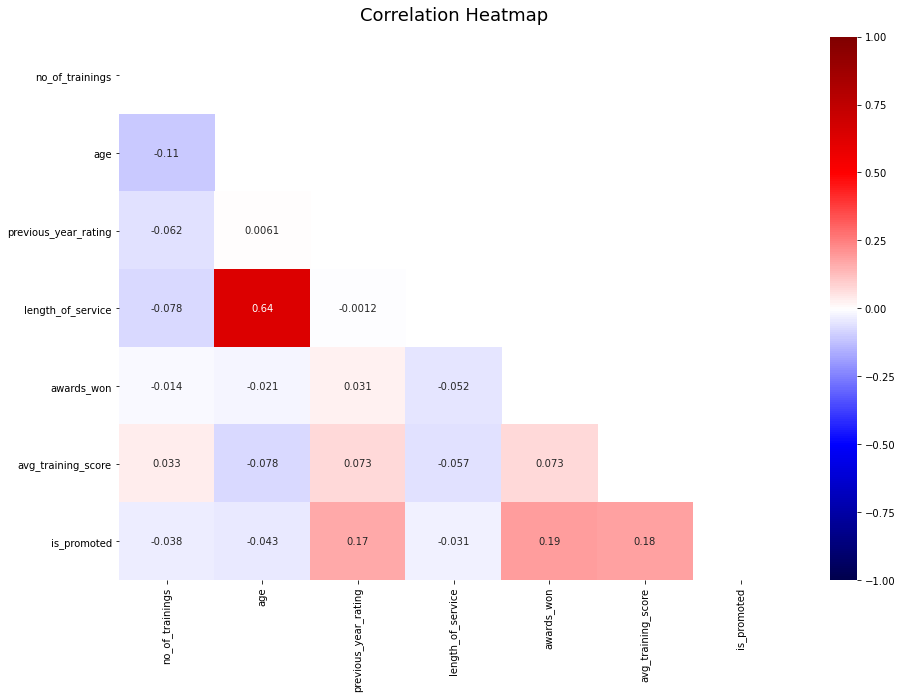

In [16]:
plt.figure(figsize= (15,10))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
HT=sns.heatmap(df.corr(), cmap="seismic",mask=mask, annot=True, vmin=-1, vmax=1);
HT.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

# 5-Pre-proccessing:

In [15]:
df = pd.get_dummies(df) #convert all categorical data to numeric
df

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,...,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m
0,1,35,5.0,8,0,49,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
1,1,30,5.0,4,0,60,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
2,1,34,3.0,7,0,50,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
3,2,39,1.0,10,0,50,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,1,45,3.0,2,0,73,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,2,31,1.0,2,0,49,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
54803,1,48,3.0,17,0,78,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
54804,1,37,2.0,6,0,56,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
54805,1,27,5.0,3,0,79,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


# 6-Split Data

In [16]:
X, y = df.drop('is_promoted',axis=1), df['is_promoted'] # split featurs and target

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # split data to train set & test set

In [18]:
X_train.isna().sum() # check nulls in train

no_of_trainings                    0
age                                0
previous_year_rating            1832
length_of_service                  0
awards_won                         0
avg_training_score                 0
department_Analytics               0
department_Finance                 0
department_HR                      0
department_Legal                   0
department_Operations              0
department_Procurement             0
department_R&D                     0
department_Sales & Marketing       0
department_Technology              0
education_Bachelor's               0
education_Below Secondary          0
education_Master's & above         0
gender_f                           0
gender_m                           0
dtype: int64

In [19]:
X_test.isna().sum() # check nulls in test

no_of_trainings                   0
age                               0
previous_year_rating            447
length_of_service                 0
awards_won                        0
avg_training_score                0
department_Analytics              0
department_Finance                0
department_HR                     0
department_Legal                  0
department_Operations             0
department_Procurement            0
department_R&D                    0
department_Sales & Marketing      0
department_Technology             0
education_Bachelor's              0
education_Below Secondary         0
education_Master's & above        0
gender_f                          0
gender_m                          0
dtype: int64

#### "fill null values after split to avoid data leakage"

In [20]:
X_train['previous_year_rating'].fillna(value= X_train['previous_year_rating'].median(),inplace = True )
X_test['previous_year_rating'].fillna(value= X_train['previous_year_rating'].median(),inplace = True )

C:\Users\shaha\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36485 entries, 4910 to 17485
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   no_of_trainings               36485 non-null  int64  
 1   age                           36485 non-null  int64  
 2   previous_year_rating          36485 non-null  float64
 3   length_of_service             36485 non-null  int64  
 4   awards_won                    36485 non-null  int64  
 5   avg_training_score            36485 non-null  int64  
 6   department_Analytics          36485 non-null  uint8  
 7   department_Finance            36485 non-null  uint8  
 8   department_HR                 36485 non-null  uint8  
 9   department_Legal              36485 non-null  uint8  
 10  department_Operations         36485 non-null  uint8  
 11  department_Procurement        36485 non-null  uint8  
 12  department_R&D                36485 non-null  uint8  
 13

In [22]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9122 entries, 6572 to 54800
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   no_of_trainings               9122 non-null   int64  
 1   age                           9122 non-null   int64  
 2   previous_year_rating          9122 non-null   float64
 3   length_of_service             9122 non-null   int64  
 4   awards_won                    9122 non-null   int64  
 5   avg_training_score            9122 non-null   int64  
 6   department_Analytics          9122 non-null   uint8  
 7   department_Finance            9122 non-null   uint8  
 8   department_HR                 9122 non-null   uint8  
 9   department_Legal              9122 non-null   uint8  
 10  department_Operations         9122 non-null   uint8  
 11  department_Procurement        9122 non-null   uint8  
 12  department_R&D                9122 non-null   uint8  
 13 

# Imbalance data:

In [23]:
y_train.value_counts() #impalance

0    32867
1     3618
Name: is_promoted, dtype: int64

In [28]:
import imblearn.over_sampling #To solve impalance

n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
ratio = {1 : n_pos * 9, 0 : n_neg} #duplicate (is_promoted when is positive (1)) 

ROS = imblearn.over_sampling.RandomOverSampler(sampling_strategy = ratio, random_state=42) # To duplicate small class

X_tr_rs, y_tr_rs = ROS.fit_resample(X_train, y_train) #here duplicate is Done 

In [29]:
y_tr_rs.value_counts() #Now is palance

0    32867
1    32562
Name: is_promoted, dtype: int64

### Another way to solve impalance

In [24]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE() 
X_train_smote, y_train_smote = oversample.fit_resample(X_train.astype('float'),y_train)

In [25]:
y_train_smote.value_counts()#Now is palance

0    32867
1    32867
Name: is_promoted, dtype: int64

# 7- Start with Modeling

## Grid Search

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# define the parameter values that should be searched
k_range = list(range(1, 10))
weight_options = ['uniform', 'distance']

In [40]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range, weights=weight_options)

In [41]:
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [32]:
# examine the best model
print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'n_neighbors': 9, 'weights': 'uniform'}
Best estimator:  KNeighborsClassifier(n_neighbors=9)
Best score:  0.9111963578702168


In [34]:
#knn.predict() 

## 1- KNN Model:

### After choose best barameter

In [34]:
knn1 = KNeighborsClassifier(n_neighbors=9, weights='uniform') #After do palance
knn1.fit(X_train_Sc, y_train_smote)
knn1.score(X_train_Sc, y_train_smote)

0.909818358840174

In [35]:
knn1.score(X_test_Sc, y_test) # overfitting!!! use another model or change parameters

0.8415917561938171

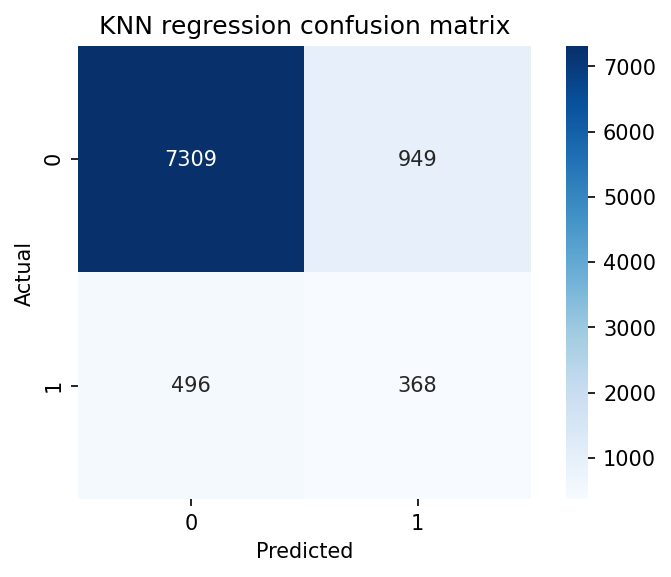

In [36]:
from sklearn.metrics import confusion_matrix
logit_confusion = confusion_matrix(y_test, knn1.predict(X_test_Sc))
plt.figure(dpi=150)
sns.heatmap(logit_confusion, annot=True, square=True, fmt = 'g',cmap=plt.cm.Blues)
           
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN regression confusion matrix');

## 2- Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

rfc1=RandomForestClassifier(random_state=42, max_features='log2', n_estimators= 100, max_depth=8, criterion='gini')
rfc1.fit(X_train_Sc, y_train_smote)
pred=rfc1.predict(X_test_Sc)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.8825915369436527


In [43]:
predTrain=rfc1.predict(X_train_Sc)
accuracy_score(y_train_smote,predTrain)

0.8718015030273527

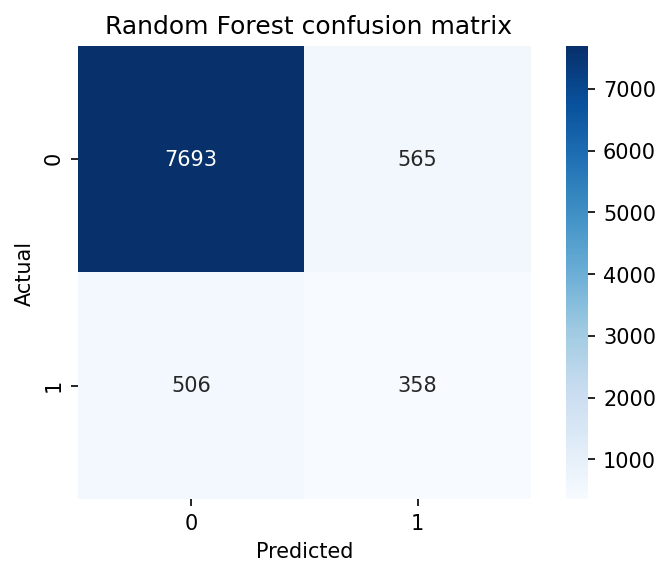

In [44]:
from sklearn.metrics import confusion_matrix
logit_confusion = confusion_matrix(y_test, rfc1.predict(X_test_Sc))
plt.figure(dpi=150)
sns.heatmap(logit_confusion, annot=True, square=True, fmt = 'g',cmap=plt.cm.Blues)
           
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(' Random Forest confusion matrix');

## 3- Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

Mymodel = LogisticRegression(solver = 'lbfgs')
Mymodel.fit(X_train_Sc, y_train_smote)

train_pred_sm = Mymodel.predict(X_train_Sc)
test_pred_sm = Mymodel.predict(X_test_Sc)

In [54]:
from sklearn.metrics import accuracy_score
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred_sm, y_train_smote))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred_sm, y_test))

Accuracy score for Training Dataset =  0.7158091702923906
Accuracy score for Testing Dataset =  0.7469853102389826


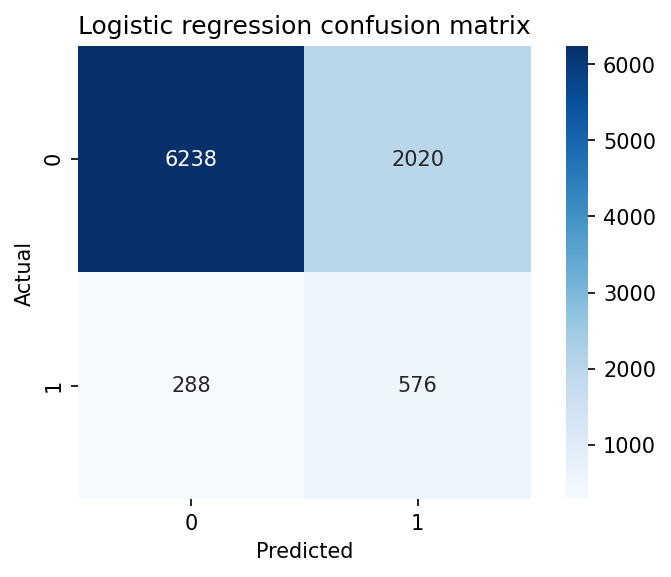

In [55]:
from sklearn.metrics import confusion_matrix
logit_confusion = confusion_matrix(y_test, Mymodel.predict(X_test_Sc))
plt.figure(dpi=150)
sns.heatmap(logit_confusion, annot=True, square=True, fmt = 'g',cmap=plt.cm.Blues)
           
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic regression confusion matrix');

## 4- Support vector machine

In [31]:
svc1=SVC() #with default hyperparameters(C = 1)

svc1.fit(X_train_smote,y_train_smote)
y_pred=svc.predict(X_test)


In [32]:
accuracy_score(y_test, y_pred)

0.6860337645253234

In [35]:
svc2=SVC(C=100.0) #with hyperparameters(C = 100)

svc2.fit(X_train_smote,y_train_smote)
y_pred2=svc2.predict(X_test)

accuracy_score(y_test, y_pred2)

0.7877658408243806

In [43]:
svc3=SVC(C=1000.0) #with hyperparameters(C = 1000)

svc3.fit(X_train_smote,y_train_smote)
y_pred=svc3.predict(X_test)

accuracy_score(y_test, y_pred)

0.8092523569392677

In [ ]:
linear_svc=SVC(kernel='linear', C=1.0) #Linear kernal

linear_svc.fit(X_train_smote,y_train_smote)
y_pred_test=linear_svc.predict(X_test)

accuracy_score(y_test, y_pred_test)

In [ ]:
poly_svc=SVC(kernel='poly', degree = 2) #Polynomial kernal

poly_svc.fit(X_train_smote,y_train_smote)
y_pred_poly=poly_svc.predict(X_test)

accuracy_score(y_test, y_pred_poly)

In [ ]:
rbf_svc=SVC(kernel='rbf') #RBF(Gaussian)kernal

rbf_svc.fit(X_train_smote,y_train_smote)
y_pred_rbf=rbf_svc.predict(X_test)

accuracy_score(y_test, y_pred_rbf)

In [ ]:
y_pred_train = linear_svc.predict(X_train_smote)
accuracy_score(y_train_smote, y_pred_train)

# SVM after Scalar

In [26]:
cols = X_train.columns

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_Sc = scaler.fit_transform(X_train_smote)

X_test_Sc = scaler.transform(X_test)

In [28]:
X_train_Sc = pd.DataFrame(X_train_Sc, columns=[cols])

In [29]:
X_test_Sc = pd.DataFrame(X_test_Sc, columns=[cols])

In [30]:
X_train_Sc.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m
count,6.573400e+04,6.573400e+04,6.573400e+04,6.573400e+04,6.573400e+04,6.573400e+04,6.573400e+04,6.573400e+04,6.573400e+04,6.573400e+04,6.573400e+04,6.573400e+04,6.573400e+04,6.573400e+04,6.573400e+04,6.573400e+04,6.573400e+04,6.573400e+04,6.573400e+04,6.573400e+04
mean,5.911918e-14,-1.646195e-15,1.131177e-13,-5.647673e-16,-1.153787e-13,-6.107777e-15,-4.182737e-15,3.006077e-15,3.564052e-14,3.440491e-14,-5.558574e-15,-3.820882e-16,-3.944105e-15,-3.161975e-15,-9.577493e-15,-1.466223e-16,-1.783741e-14,-5.248855e-15,-8.969320e-15,9.054545e-15
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-4.218638e-01,-2.033661e+00,-2.231083e+00,-1.198350e+00,-2.830631e-01,-1.962879e+00,-3.425919e-01,-2.353586e-01,-2.053889e-01,-1.339998e-01,-5.533251e-01,-4.267435e-01,-1.342826e-01,-6.219016e-01,-4.389972e-01,-1.478565e+00,-1.239832e-01,-7.024779e-01,-7.043682e-01,-1.553355e+00
25%,-4.218638e-01,-6.910569e-01,-5.123522e-01,-7.191512e-01,-2.830631e-01,-8.475727e-01,-3.425919e-01,-2.353586e-01,-2.053889e-01,-1.339998e-01,-5.533251e-01,-4.267435e-01,-1.342826e-01,-6.219016e-01,-4.389972e-01,-1.478565e+00,-1.239832e-01,-7.024779e-01,-7.043682e-01,-1.553355e+00
50%,-4.218638e-01,-1.558642e-01,-9.721431e-02,-2.399522e-01,-2.830631e-01,-1.505060e-01,-3.425919e-01,-2.353586e-01,-2.053889e-01,-1.339998e-01,-5.533251e-01,-4.267435e-01,-1.342826e-01,-6.219016e-01,-4.389972e-01,7.266514e-01,-1.239832e-01,-7.024779e-01,-7.043682e-01,7.043682e-01
75%,-4.218638e-01,5.172870e-01,1.206379e+00,4.788464e-01,-2.830631e-01,8.950941e-01,-3.425919e-01,-2.353586e-01,-2.053889e-01,-1.339998e-01,-2.161038e-01,-4.267435e-01,-1.342826e-01,1.153705e+00,-4.389972e-01,7.266514e-01,-1.239832e-01,1.526444e+00,1.553355e+00,7.043682e-01
max,1.605166e+01,3.336756e+00,1.206379e+00,7.427232e+00,4.393239e+00,2.219521e+00,3.130318e+00,4.724658e+00,5.285452e+00,8.119611e+00,1.958919e+00,2.545923e+00,8.040182e+00,1.703699e+00,2.437574e+00,7.266514e-01,8.515961e+00,1.526444e+00,1.553355e+00,7.043682e-01


## SVM C = 1

In [53]:
svc1=SVC() #with default hyperparameters(C = 1)

svc1.fit(X_train_Sc,y_train_smote)
y_pred=svc1.predict(X_test_Sc)
accuracy_score(y_test, y_pred)

0.9035299276474458

In [44]:
y_pred_train = svc1.predict(X_train_Sc)
accuracy_score(y_train_smote, y_pred_train)

0.8389417957221529

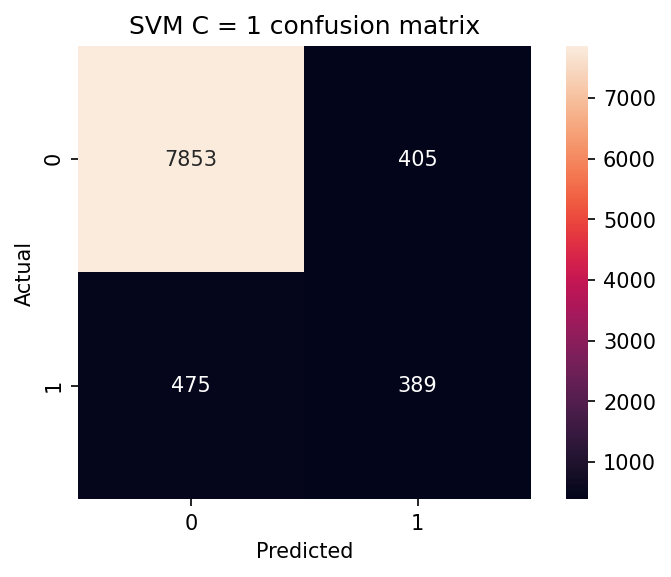

In [55]:
from sklearn.metrics import confusion_matrix
logit_confusion = confusion_matrix(y_test, svc1.predict(X_test_Sc))
plt.figure(dpi=150)
sns.heatmap(logit_confusion, annot=True, square=True, fmt = 'g')
           
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM C = 1 confusion matrix');

## SVM C = 100

In [33]:
svc2=SVC(C=100.0) #with hyperparameters(C = 100)

svc2.fit(X_train_Sc,y_train_smote)
y_pred2=svc2.predict(X_test_Sc)

accuracy_score(y_test, y_pred2)

0.9140539355404517

In [34]:
y_pred_train = svc2.predict(X_train_Sc)
accuracy_score(y_train_smote, y_pred_train)

0.8736726808044544

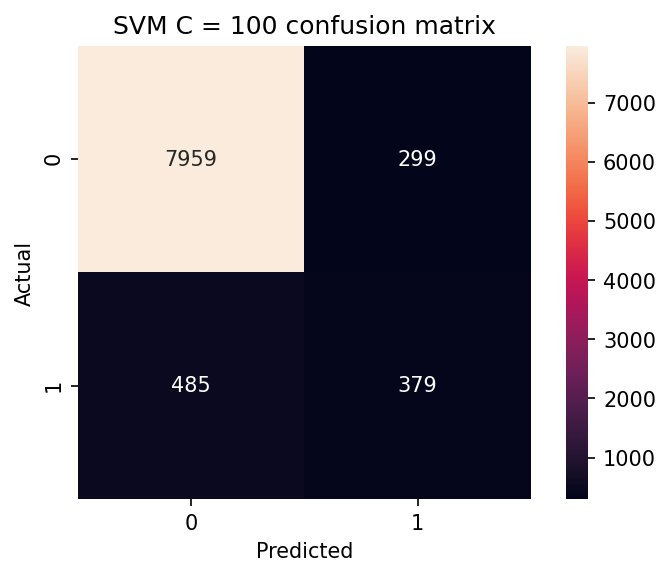

In [57]:
from sklearn.metrics import confusion_matrix
logit_confusion = confusion_matrix(y_test, svc2.predict(X_test_Sc))
plt.figure(dpi=150)
sns.heatmap(logit_confusion, annot=True, square=True, fmt = 'g')
           
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM C = 100 confusion matrix');

## SVM C = 1000

In [35]:
svc3=SVC(C=1000.0) #with hyperparameters(C = 1000)

svc3.fit(X_train_Sc,y_train_smote)
y_pred=svc3.predict(X_test_Sc)

accuracy_score(y_test, y_pred)

0.905064678798509

In [36]:
y_pred_train = svc3.predict(X_train_Sc)
accuracy_score(y_train_smote, y_pred_train)

0.8839413393373292

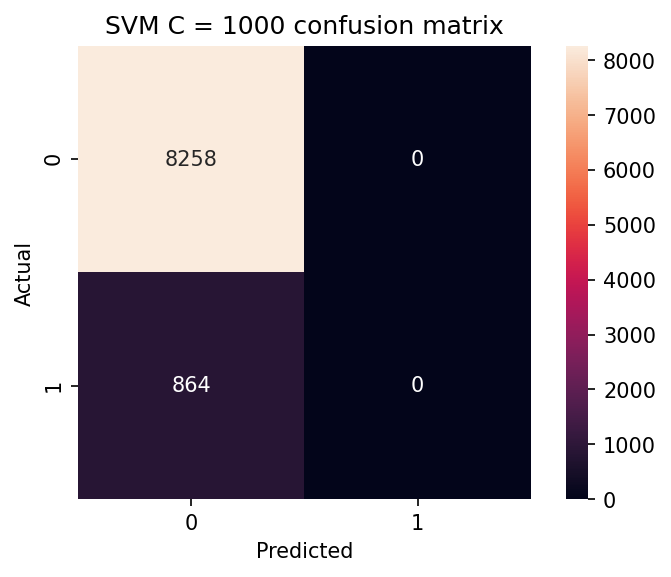

In [56]:
from sklearn.metrics import confusion_matrix
logit_confusion = confusion_matrix(y_test, svc3.predict(X_test_Sc))
plt.figure(dpi=150)
sns.heatmap(logit_confusion, annot=True, square=True, fmt = 'g')
           
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM C = 1000 confusion matrix');

## SVM linear 

In [39]:
linear_svc=SVC(kernel='linear') #Linear kernal

linear_svc.fit(X_train_Sc,y_train_smote)
y_pred_test=linear_svc.predict(X_test_Sc)

accuracy_score(y_test, y_pred_test)

0.7644156983117737

In [40]:
y_pred_train1 = linear_svc.predict(X_train_Sc)
accuracy_score(y_train_smote, y_pred_train1)

0.7177411993793167

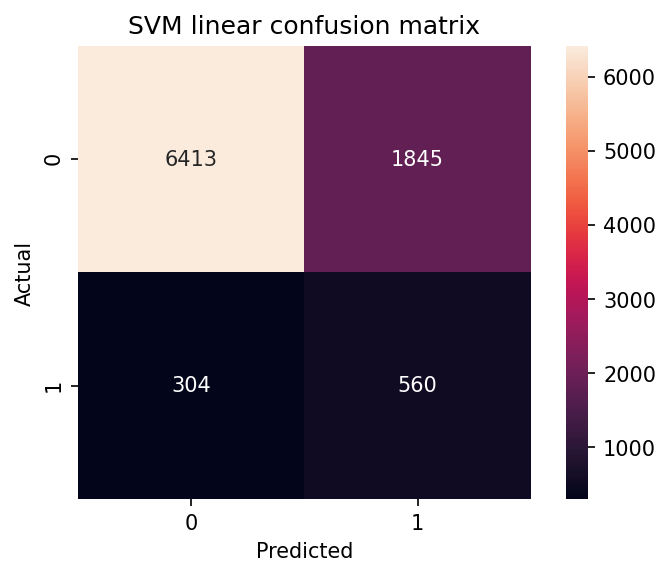

In [59]:
from sklearn.metrics import confusion_matrix
logit_confusion = confusion_matrix(y_test, linear_svc.predict(X_test_Sc))
plt.figure(dpi=150)
sns.heatmap(logit_confusion, annot=True, square=True, fmt = 'g')
           
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM linear confusion matrix');

## SVM polynomial degree = 2

In [37]:
poly_svc=SVC(kernel='poly', degree = 2) #Polynomial kernal

poly_svc.fit(X_train_Sc,y_train_smote)
y_pred_poly=poly_svc.predict(X_test_Sc)

accuracy_score(y_test, y_pred_poly)

0.8351238763429073

In [38]:
y_pred_train = poly_svc.predict(X_train_Sc)
accuracy_score(y_train_smote, y_pred_train)

0.7602154136367786

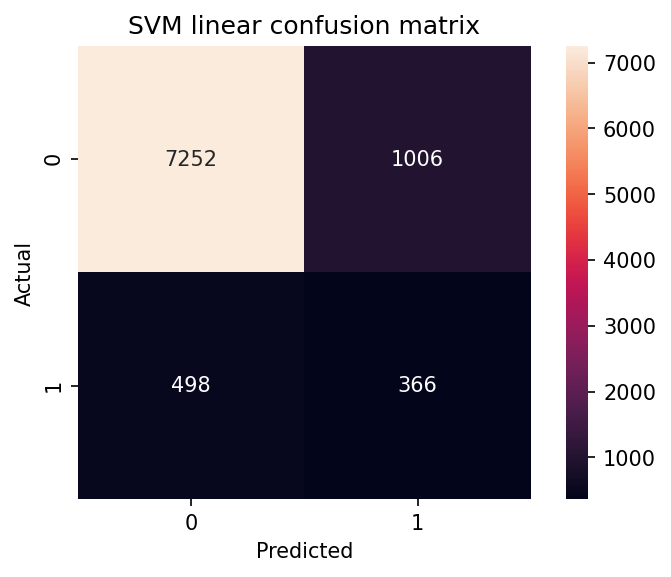

In [60]:
from sklearn.metrics import confusion_matrix
logit_confusion = confusion_matrix(y_test, poly_svc.predict(X_test_Sc))
plt.figure(dpi=150)
sns.heatmap(logit_confusion, annot=True, square=True, fmt = 'g')
           
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM linear confusion matrix');

## SVM rbf C = 1

In [41]:
rbf_svc=SVC(kernel='rbf') #RBF(Gaussian)kernal

rbf_svc.fit(X_train_Sc,y_train_smote)
y_pred_rbf=rbf_svc.predict(X_test_Sc)

accuracy_score(y_test, y_pred_rbf)

0.9035299276474458

In [42]:
y_pred_trainbrf = rbf_svc.predict(X_train_Sc)
accuracy_score(y_train_smote, y_pred_trainbrf)

0.8365685946389996

## SVM rbf & C = 100

In [37]:
rbf_svc1=SVC(kernel='rbf', C=100.0) #RBF(Gaussian)kernal

rbf_svc1.fit(X_train_Sc,y_train_smote)
y_pred_rbf=rbf_svc1.predict(X_test_Sc)

accuracy_score(y_test, y_pred_rbf)

0.9131769348827011

In [38]:
y_pred_trainbrf = rbf_svc1.predict(X_train_Sc)
accuracy_score(y_train_smote, y_pred_trainbrf)

0.8754830072717316

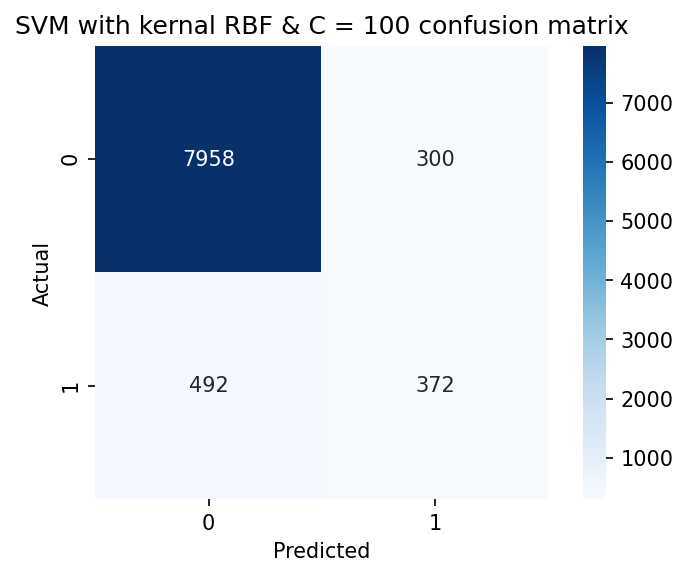

In [39]:
from sklearn.metrics import confusion_matrix
logit_confusion = confusion_matrix(y_test, rbf_svc1.predict(X_test_Sc))
plt.figure(dpi=150)
sns.heatmap(logit_confusion, annot=True, square=True, fmt = 'g',cmap=plt.cm.Blues)
           
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM with kernal RBF & C = 100 confusion matrix');

## SVM rbf & C = 1000

In [52]:
rbf_svc=SVC(kernel='rbf', C=1000.0) #RBF(Gaussian)kernal 

rbf_svc.fit(X_train_Sc,y_train_smote)
y_pred_trainbrf = rbf_svc.predict(X_train_Sc)
accuracy_score(y_train_smote, y_pred_trainbrf)

0.8861776249733776

In [53]:
y_pred_rbf=rbf_svc.predict(X_test_Sc)
accuracy_score(y_test, y_pred_rbf)

0.9096689322516992

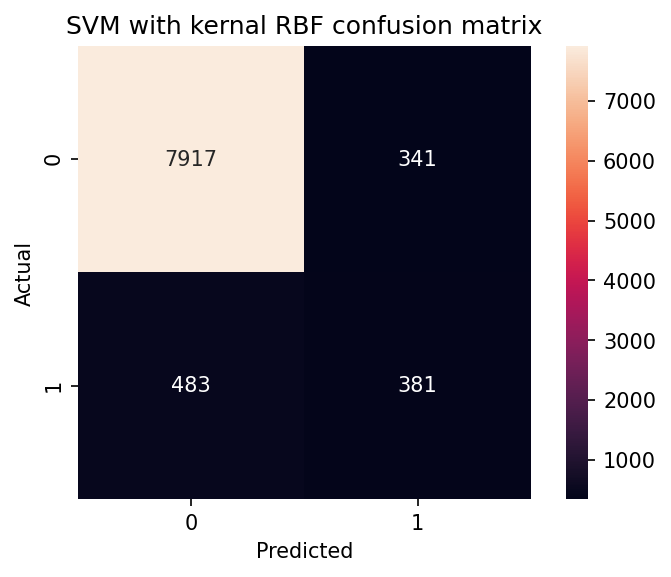

In [54]:
from sklearn.metrics import confusion_matrix
logit_confusion = confusion_matrix(y_test, rbf_svc.predict(X_test_Sc))
plt.figure(dpi=150)
sns.heatmap(logit_confusion, annot=True, square=True, fmt = 'g')
           
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM with kernal RBF confusion matrix');

### Just try to use Voting Classifier 

In [64]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

seed = 765

log_clf = LogisticRegression(random_state=seed)
rnd_clf = RandomForestClassifier(random_state=seed)
dt_clf = DecisionTreeClassifier(random_state=seed)

voting_clf = VotingClassifier(estimators =[('lr', log_clf ), ('df', dt_clf), ('rf', rnd_clf)])
voting_clf.fit(X_train_Sc, y_train_smote)
y_pred_clf = voting_clf.predict(X_test_Sc)

print('Accuracy=' , accuracy_score(y_test,y_pred_clf))

Accuracy= 0.8985967989475993


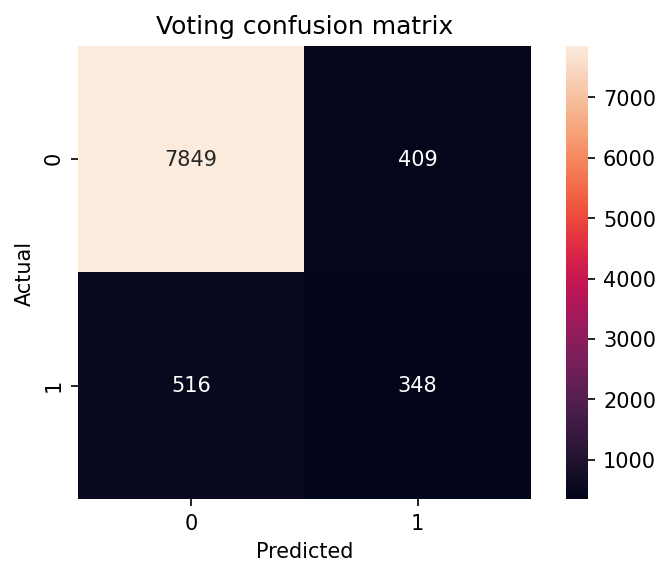

In [65]:
from sklearn.metrics import confusion_matrix
logit_confusion = confusion_matrix(y_test, voting_clf.predict(X_test_Sc))
plt.figure(dpi=150)
sns.heatmap(logit_confusion, annot=True, square=True, fmt = 'g')
           
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Voting confusion matrix');

# Voting Ensample

In [44]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


estimators = []
log_reg = LogisticRegression(solver='liblinear')
estimators.append(('Logistic', log_reg))

tree = DecisionTreeClassifier()
estimators.append(('Tree', tree))

svm_clf = SVC(gamma='scale')
estimators.append(('SVM', svm_clf))

voting = VotingClassifier(estimators=estimators)
voting.fit(X_train_Sc, y_train_smote)

#evaluate(voting, X_train_Sc, X_test_Sc, y_train_smote, y_test)

VotingClassifier(estimators=[('Logistic',
                              LogisticRegression(solver='liblinear')),
                             ('Tree', DecisionTreeClassifier()),
                             ('SVM', SVC())])

In [45]:
y_pred_train = voting.predict(X_train_Sc)
accuracy_score(y_train_smote, y_pred_train)

0.8917759454772264

In [46]:
y_pred_train2 = voting.predict(X_test_Sc)
accuracy_score(y_test, y_pred_train2)

0.8890594167945626

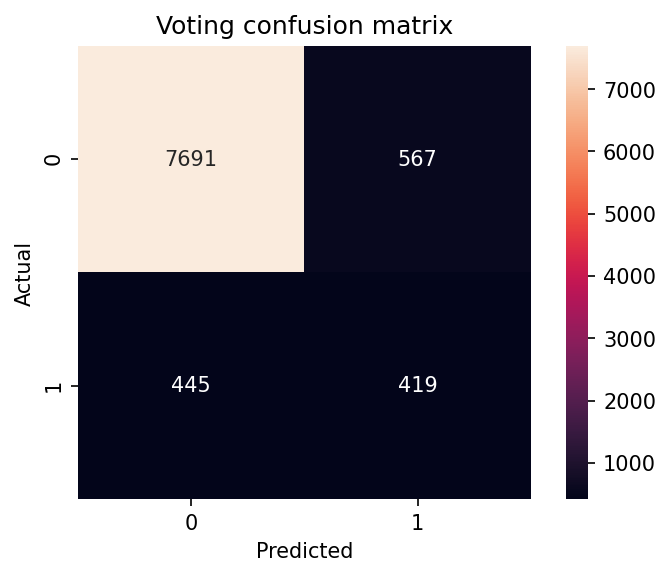

In [48]:
from sklearn.metrics import confusion_matrix
logit_confusion = confusion_matrix(y_test, voting.predict(X_test_Sc))
plt.figure(dpi=150)
sns.heatmap(logit_confusion, annot=True, square=True, fmt = 'g')
           
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Voting confusion matrix');

# 5- Destion tree

In [56]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 28, min_samples_leaf = 1, min_samples_split = 8, splitter = 'random')
dtc.fit(X_train_Sc, y_train_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_split=8,
                       splitter='random')

In [57]:
y_pred = dtc.predict(X_test_Sc)

In [58]:
# accuracy score

print(accuracy_score(y_train_smote, dtc.predict(X_train_Sc)))

dtc_acc = accuracy_score(y_test, dtc.predict(X_test_Sc))
print(dtc_acc)

0.9092554842242979
0.9010085507564131


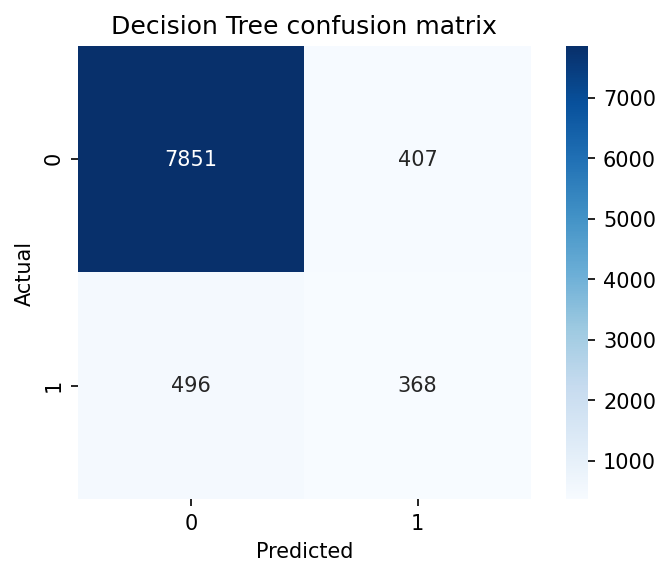

In [61]:
from sklearn.metrics import confusion_matrix
logit_confusion = confusion_matrix(y_test, dtc.predict(X_test_Sc))
plt.figure(dpi=150)
sns.heatmap(logit_confusion, annot=True, square=True, fmt = 'g',cmap=plt.cm.Blues)
           
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree confusion matrix');

# 6- ADA

In [36]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)

ada = AdaBoostClassifier(dtc, n_estimators = 180)
ada.fit(X_train_Sc, y_train_smote)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=28,
                                                         min_samples_split=8,
                                                         splitter='random'),
                   n_estimators=180)

In [37]:
y_pred = ada.predict(X_test_Sc)

In [38]:
# accuracy score

print(accuracy_score(y_train_smote, ada.predict(X_train_Sc)))

ada_acc = accuracy_score(y_test, y_pred)
print(ada_acc)

0.9938235920528189
0.8978294233720675


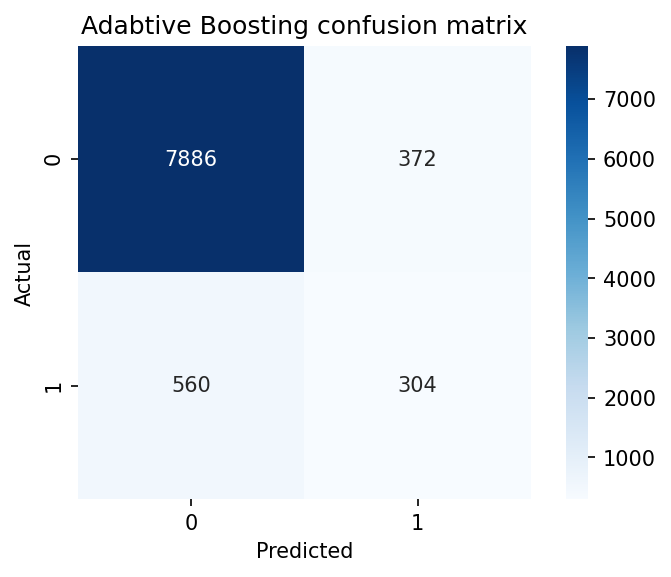

In [45]:
from sklearn.metrics import confusion_matrix
logit_confusion = confusion_matrix(y_test, ada.predict(X_test_Sc))
plt.figure(dpi=150)
sns.heatmap(logit_confusion, annot=True, square=True, fmt = 'g',cmap=plt.cm.Blues)
           
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Adabtive Boosting confusion matrix');

# 7- Gradient Boosting Classifier

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train_Sc, y_train_smote)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [36]:
# best parameters 
grid_search_gbc.best_params_

{'learning_rate': 1, 'loss': 'deviance', 'n_estimators': 150}

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

bc = GradientBoostingClassifier(learning_rate = 1, loss = 'deviance', n_estimators = 150)
bc.fit(X_train_Sc, y_train_smote)

GradientBoostingClassifier(learning_rate=1, n_estimators=150)

In [49]:
y_pred = bc.predict(X_test_Sc)

In [50]:
# accuracy score

print(accuracy_score(y_train_smote, bc.predict(X_train_Sc)))

gbc_acc = accuracy_score(y_test, y_pred)
print(gbc_acc)

0.9631545319012992
0.9364174523130893


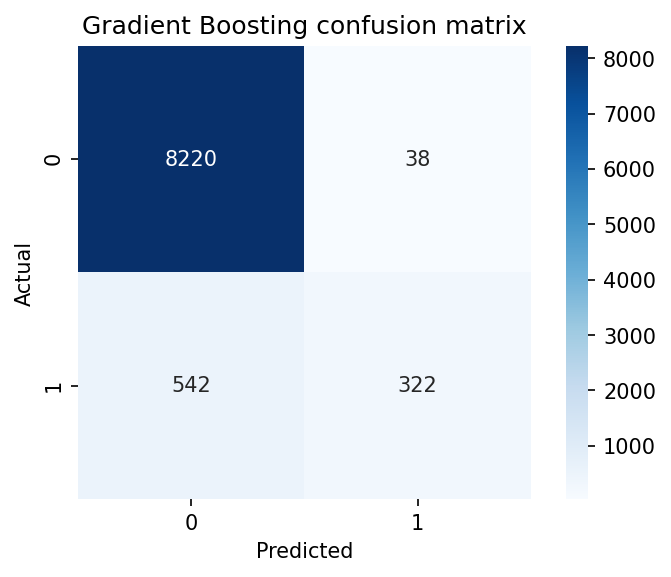

In [51]:
from sklearn.metrics import confusion_matrix
logit_confusion = confusion_matrix(y_test, bc.predict(X_test_Sc))
plt.figure(dpi=150)
sns.heatmap(logit_confusion, annot=True, square=True, fmt = 'g',cmap=plt.cm.Blues)
           
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gradient Boosting confusion matrix');

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8258
           1       0.89      0.37      0.53       864

    accuracy                           0.94      9122
   macro avg       0.92      0.68      0.75      9122
weighted avg       0.93      0.94      0.92      9122



### Gradient Boosting Classifier is the best model for our data..